## Challenge 2

### Fernando Hidalgo

In [360]:
import requests
from bs4 import BeautifulSoup as bf
import pandas as pd
import numpy as np
import codecs
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
from selenium.webdriver.support.ui import Select
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
import re
from collections import Counter
from datetime import datetime
import datetime
from sklearn import cross_validation, linear_model, preprocessing

%matplotlib inline

In [361]:
data  = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')


In [362]:
data.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


In [363]:
data.ReleaseDate[0]

'2013-11-22 00:00:00'

## Challenge 1

Plot domestic total gross over time.



In [364]:
data['ReleaseDate'] = pd.to_datetime(data.ReleaseDate)

In [365]:
data['ReleaseDate'] = data.ReleaseDate.dt.date

In [366]:
data = data.sort_values('ReleaseDate')

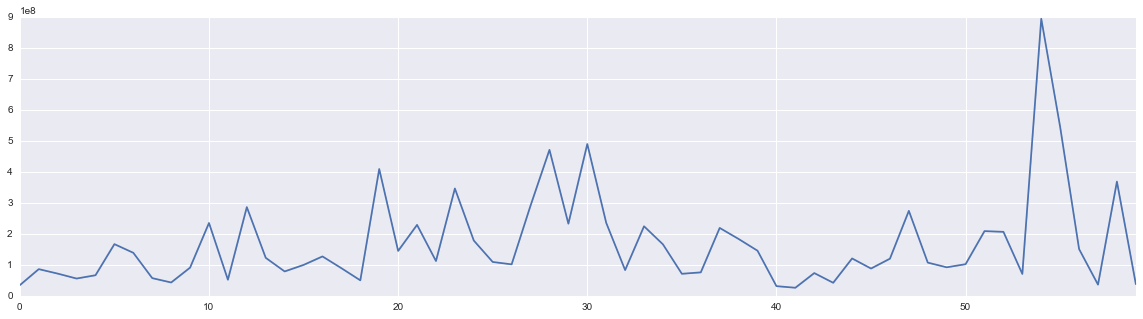

In [370]:
sns.tsplot(data.groupby('ReleaseDate').sum()['DomesticTotalGross'])
sns.set_context(rc={"figure.figsize": (20, 5)})


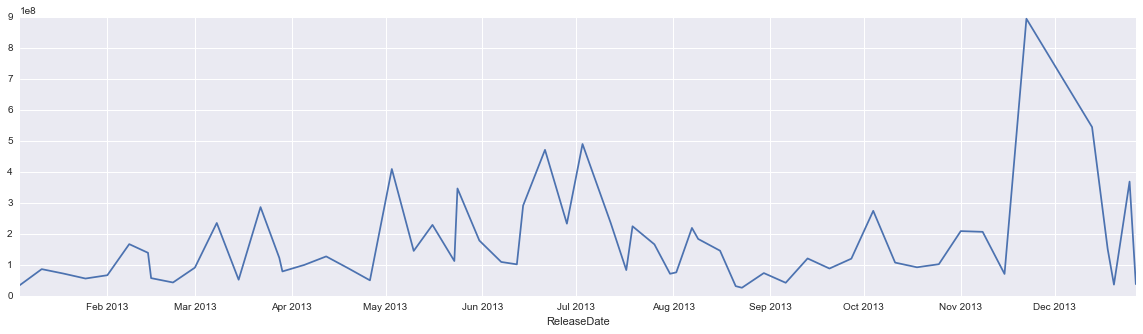

In [380]:
data.groupby('ReleaseDate').sum()['DomesticTotalGross'].plot()

## Challenge 2

Plot runtime vs. domestic total gross.



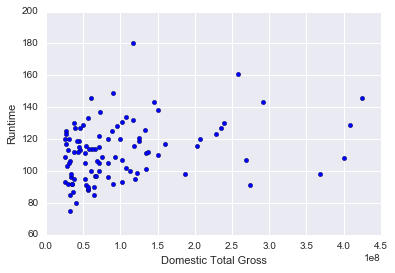

In [177]:
ax = plt.scatter(x = 'DomesticTotalGross', y = 'Runtime', data= data)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Runtime')

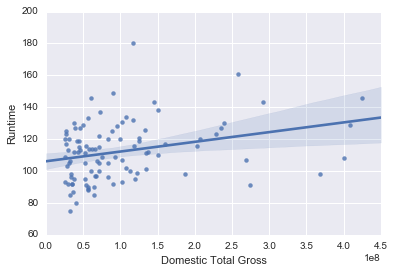

In [179]:
sns.regplot(x = 'DomesticTotalGross', y = 'Runtime', data= data)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Runtime')

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.



### Average Runtime per Rating

In [381]:
data.groupby('Rating').mean()['Runtime']

Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64

### Average Domestric Gross per Rating


In [382]:
data.groupby('Rating').mean()['DomesticTotalGross']

Rating
G        2.684928e+08
PG       1.311357e+08
PG-13    1.114498e+08
R        6.989243e+07
Name: DomesticTotalGross, dtype: float64

## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



In [297]:
data.Rating.value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

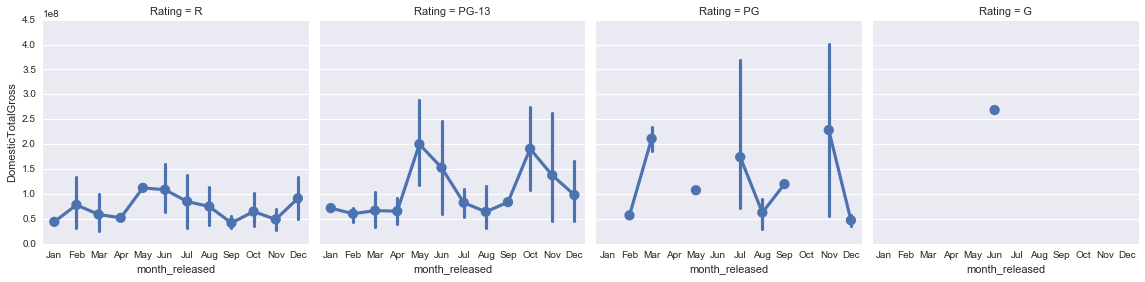

In [324]:
plt.figure(figsize = (12,10))
_ = sns.factorplot('month_released', 'DomesticTotalGross', data = data, col = 'Rating', kind = 'point')

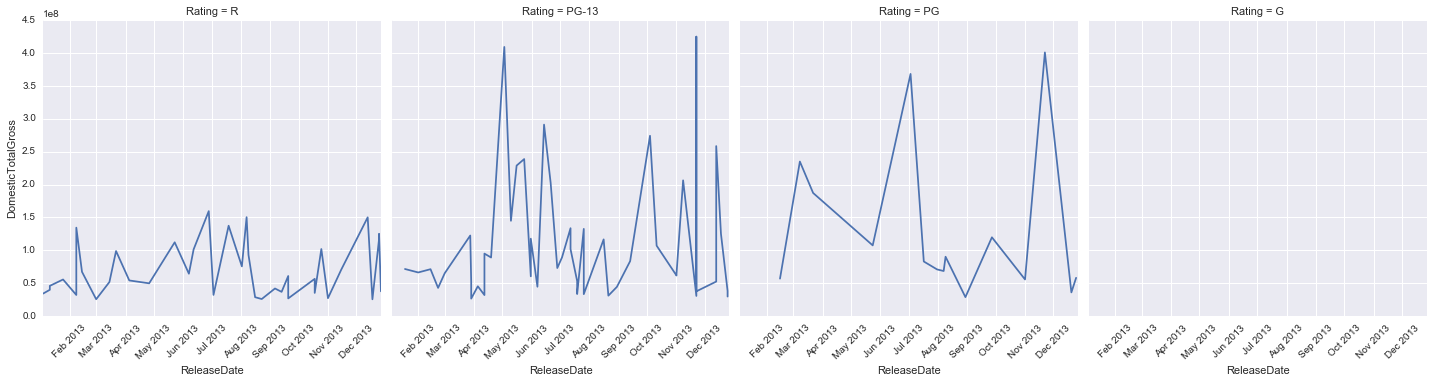

In [340]:
g = sns.FacetGrid(data, col="Rating", size = 5)
g = g.map(plt.plot,'ReleaseDate', 'DomesticTotalGross')
g.set_xticklabels( rotation=45 ) 


## Challenge 5

What director in your dataset has the highest gross per movie?



In [197]:
data.groupby('Director').mean()['DomesticTotalGross'].sort_values(ascending = False).head()

Director
Francis Lawrence             424668047.0
Shane Black                  409013994.0
Chris BuckJennifer Lee       400738009.0
Pierre CoffinChris Renaud    368061265.0
Zack Snyder                  291045518.0
Name: DomesticTotalGross, dtype: float64

### Francis Lawrence with and average of $424,668,047 per movie

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."


In [316]:
data['month_released'] = [date.strftime("%b") for date in data.ReleaseDate]

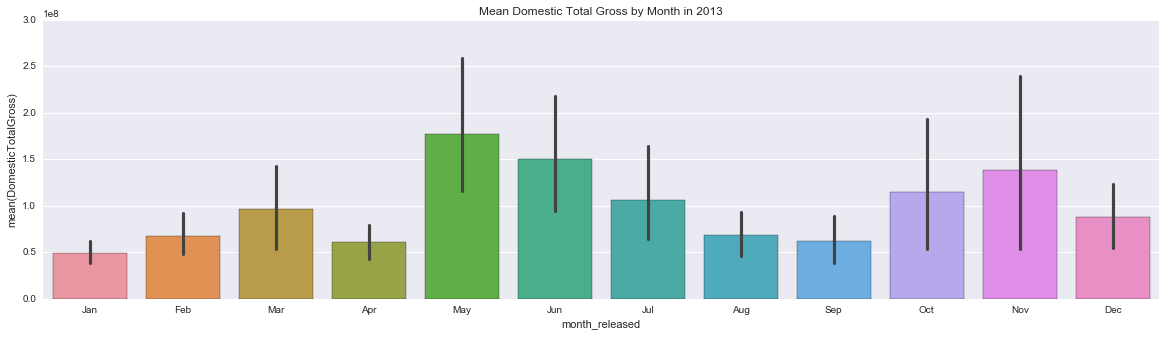

In [237]:
sns.barplot(x = 'month_released' , y = 'DomesticTotalGross', data = data)
sns.set_context(rc={"figure.figsize": (20, 60)})

plt.title('Mean Domestic Total Gross by Month in 2013')

In [266]:
data.groupby('month_released').get_group('Apr').sort_values('DomesticTotalGross', ascending = False)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month_released
36,42,40000000.0,95020213,Brian Helgeland,PG-13,128,2013-04-12,Apr
40,Oblivion,120000000.0,89107235,Joseph Kosinski,PG-13,125,2013-04-19,Apr
64,Evil Dead,17000000.0,54239856,Fede Alvarez,R,91,2013-04-05,Apr
69,Pain and Gain,26000000.0,49875291,Michael Bay,R,129,2013-04-26,Apr
71,Jurassic Park 3D,10000000.0,45385935,NaN,PG-13,127,2013-04-05,Apr
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12,Apr


In [265]:
data.groupby('month_released').get_group('Nov').sort_values('DomesticTotalGross', ascending = False)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month_released
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,Nov
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,Nov
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08,Nov
49,The Best Man Holiday,17000000.0,70525195,Malcolm D. Lee,R,122,2013-11-15,Nov
55,Last Vegas,28000000.0,63914167,Jon Turteltaub,PG-13,90,2013-11-01,Nov
56,Ender's Game,110000000.0,61737191,Gavin Hood,PG-13,114,2013-11-01,Nov
62,Free Birds,55000000.0,55750480,Jimmy Hayward,PG,90,2013-11-01,Nov
79,Philomena,12000000.0,37709979,Stephen Frears,PG-13,95,2013-11-22,Nov
90,Delivery Man,26000000.0,30664106,Ken Scott,PG-13,105,2013-11-22,Nov
94,Dallas Buyers Club,5000000.0,27298285,Jean-Marc Vallee,R,117,2013-11-01,Nov


### You can see there is high variability in November which has the biggest error bar while April has lower variability as well as a small error bar 
